<a href="https://colab.research.google.com/github/mnarasani/FoodHub/blob/main/FoodHub_Project_FullCode_Murali_Narasani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Supress any warnings due to library versions
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code to read the data from csv (inout) data file
df=pd.read_csv('/content/drive/MyDrive/PythonFoundation/Project1_FoodHub/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows

#Using the head function to view the first 5 rows in the dataset.
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

#Using shape function to get the rows and columns in the dataset.
df.shape

# Another way of checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
**There are 1898 rows and 9 columns in the Foodhub dataset provided.**

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# checking the count of different data types in rating column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
#listing the rows where the ratings were not provided to review the data..
df.loc[df['rating'] == 'Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.920,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.130,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.820,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.820,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.150,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24


In [ ]:
#checking the count of different data types in cost_of_the_order column
df['cost_of_the_order'].apply(type).value_counts()

cost_of_the_order
<class 'float'>    1898
Name: count, dtype: int64

In [ ]:
#checking the count of different data types in food_preparation_time column
df['food_preparation_time'].apply(type).value_counts()

food_preparation_time
<class 'int'>    1898
Name: count, dtype: int64

In [ ]:
#checking the count of different data types in delivery_time column
df['delivery_time'].apply(type).value_counts()

delivery_time
<class 'int'>    1898
Name: count, dtype: int64

In [ ]:
#checking the count of different data types in order_id column
df['order_id'].apply(type).value_counts()

order_id
<class 'int'>    1898
Name: count, dtype: int64

In [ ]:
#checking the count of different data types in customer_id column
df['customer_id'].apply(type).value_counts()

customer_id
<class 'int'>    1898
Name: count, dtype: int64

In [ ]:
#checking to see if there are any rows that are duplicated
df.duplicated().sum()

0

#### Observations:

*   **There are 4 attributes that are integer data type, 4 attributes that are
object(string) data type and 1 attribute that is float data type**.
*   If we observe the **rating** column should be an integer data type, since there are about 736 rows where ratings was not provided ('Not given') it is string data type.
*   Rest of all the columns/ attributes (cost_of_the_order, food_preparation_time, delivery_time, irder_id, customer_id data types and the data within them are as expected.
*   There are no duplicated rows in the dataset.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
#df.info will show the number if values that are notnull in the provided data by columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#There are other ways to get the count of null values in the dataset
#isnull function provides the list of null values and the sum() gives the count by columns.
print(df.isnull().sum())

#print(df.isnull().sum().sum()) will provide the count of the total number of columns that are null
print('Total number of values that are missing values :', df.isnull().sum().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Total number of values that are missing values : 0


In [ ]:
#Display the % of missing values in the dataset when there are missing values..
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage


#### Observations:
There are **no missing values** in the provided dataset so **we do not need to perform the missing value treatment** on any columns in the provided dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Using describe function to get the statistical summary of the values provided in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:

- *The minumum time it takes to prepare food is :* **20 mins**

- *The Average time to prepare the food is :* **27.37 mins**

- *The maximum time it takes to prepare the food is :* **35 mins**




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#Using value counts function to get the couts of different values for the given attribute/ column, in ths case rating column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

*   **There are 736 orders that are not rated (where the attribute value is 'Not Given')**
*   This is high percentage of customers not giving ratings, so Foodhub could provide additional incentive / offers / future use coupons for customers who provide the ratings.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
#libraries to help data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#command to tell python to actually display the graphs
%matplotlib inline

**Observations on Cost of the order**

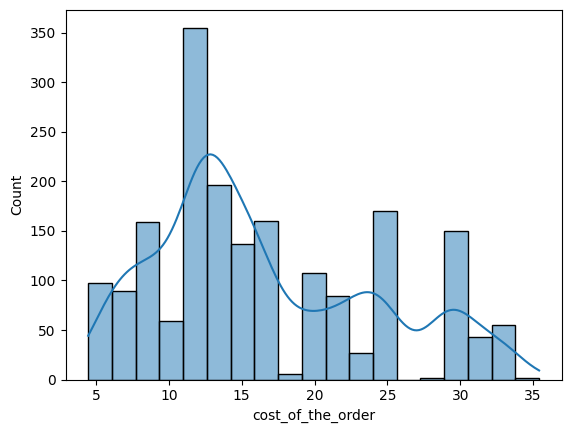

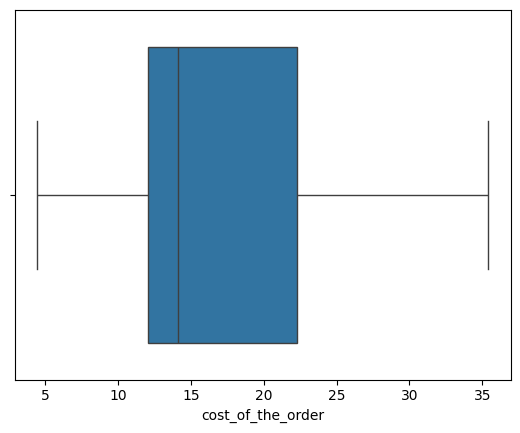

In [ ]:
sns.histplot(data=df,x='cost_of_the_order', kde=True);
plt.show()
sns.boxplot(df, x='cost_of_the_order')
plt.show()

In [ ]:
df['cost_of_the_order'].value_counts()

cost_of_the_order
12.180    86
12.130    82
12.230    47
24.200    42
29.100    37
          ..
5.480      1
17.070     1
6.260      1
9.610      1
29.590     1
Name: count, Length: 312, dtype: int64



*   Cost of the order is skewed towards right.
*   There are no outliers present in this column.

**Observations on Food Preparation time**

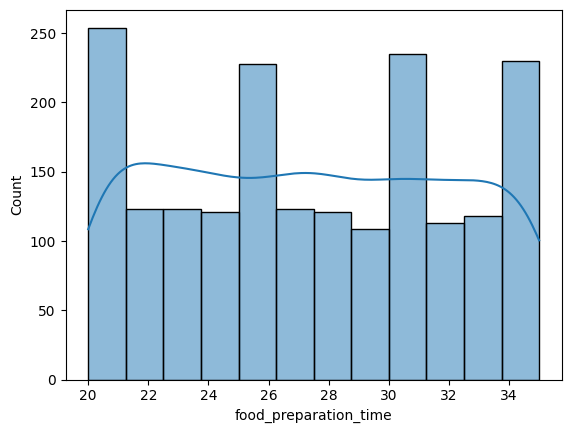

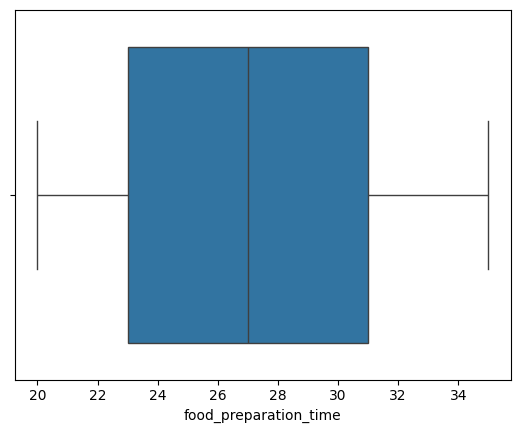

In [ ]:
sns.histplot(data=df,x='food_preparation_time', kde=True);
plt.show()
sns.boxplot(df, x='food_preparation_time')
plt.show()



*   Data is normally distributed.
*   There are no outliers

**Observations on Delivery Time**

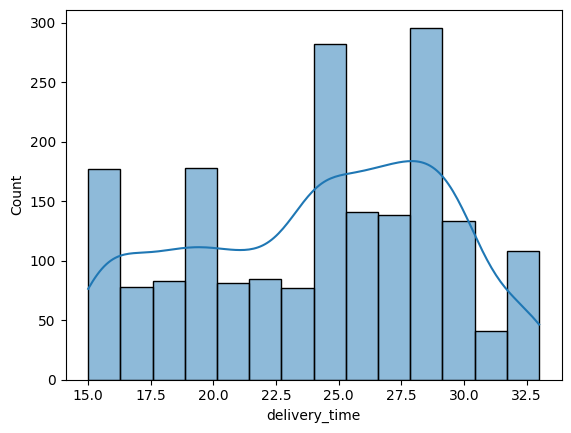

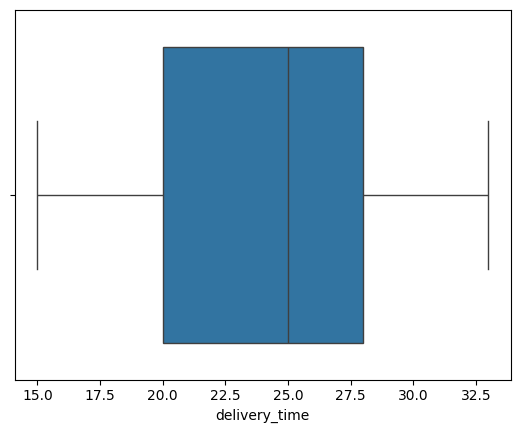

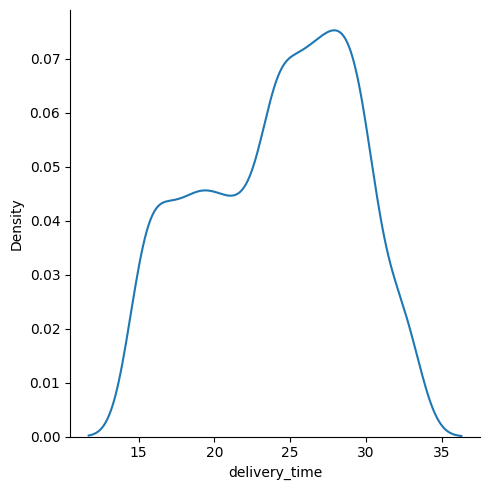

In [ ]:
sns.histplot(data=df,x='delivery_time', kde=True);
plt.show()
sns.boxplot(df, x='delivery_time')
plt.show()
sns.displot(data=df,x='delivery_time',kind='kde')
plt.show()



*   Distribution is slightly skeewd towards the left, where the 25th percentile is at 20 mins, 50th percentile is at 25 mins, 75th percentile is at about 28 mins and minimum time is 15 mins and max time is about 33 mins



**Observations on Cuisine Type**

In [ ]:
# check the count of unique number of cuisine type, value counts, and countplot.
df['cuisine_type'].nunique()

14

In [ ]:
#Getting the total number of orders by cuisine type
cuisine_type_counts = df["cuisine_type"].value_counts
cuisine_type_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

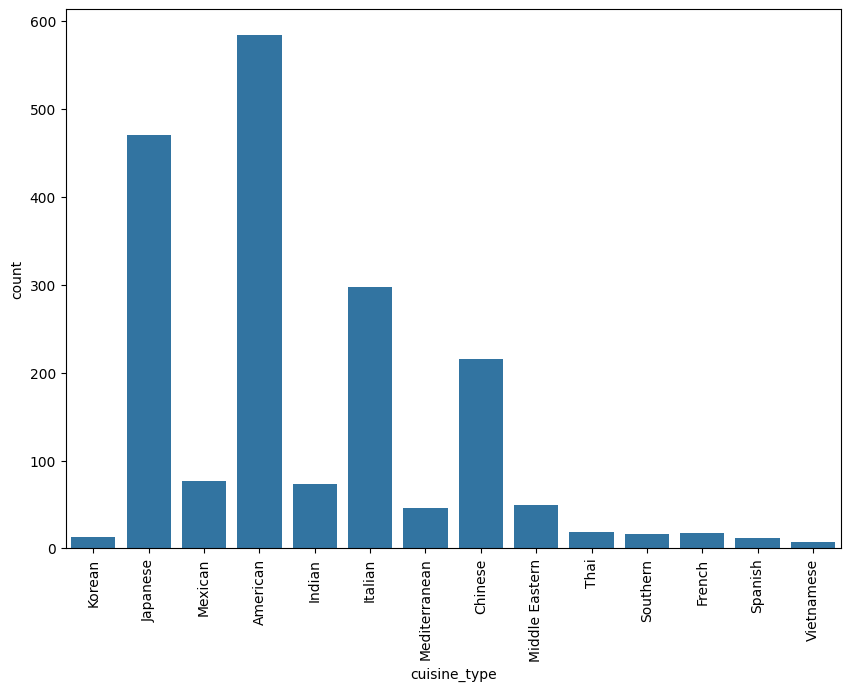

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

Observations:

*   **American cuisine** is the most popular among customers, which indicates a preference for American food among the customers of FoodHub.
*   **Asian cuisine** follows as the second and fourth most popular cuisine types.
*   The gap of orders between the **American (highest) and Vietnamese (lowest) is quite large** and could suggest the platform might have a lot more restaurant offerings in certain cusines than others
*   **Potential Opporunities** If the supply is low for cuisines like Vietnamese, Spanish, Korean, Southern, French, and Thai but the demand is potentially high, Food Hub could see a business opportunity. Might consider onboarding more restaurants offering these cusines






### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Get the value count of the restaurent names from the dataset to get the top restaurents that are repeating..
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

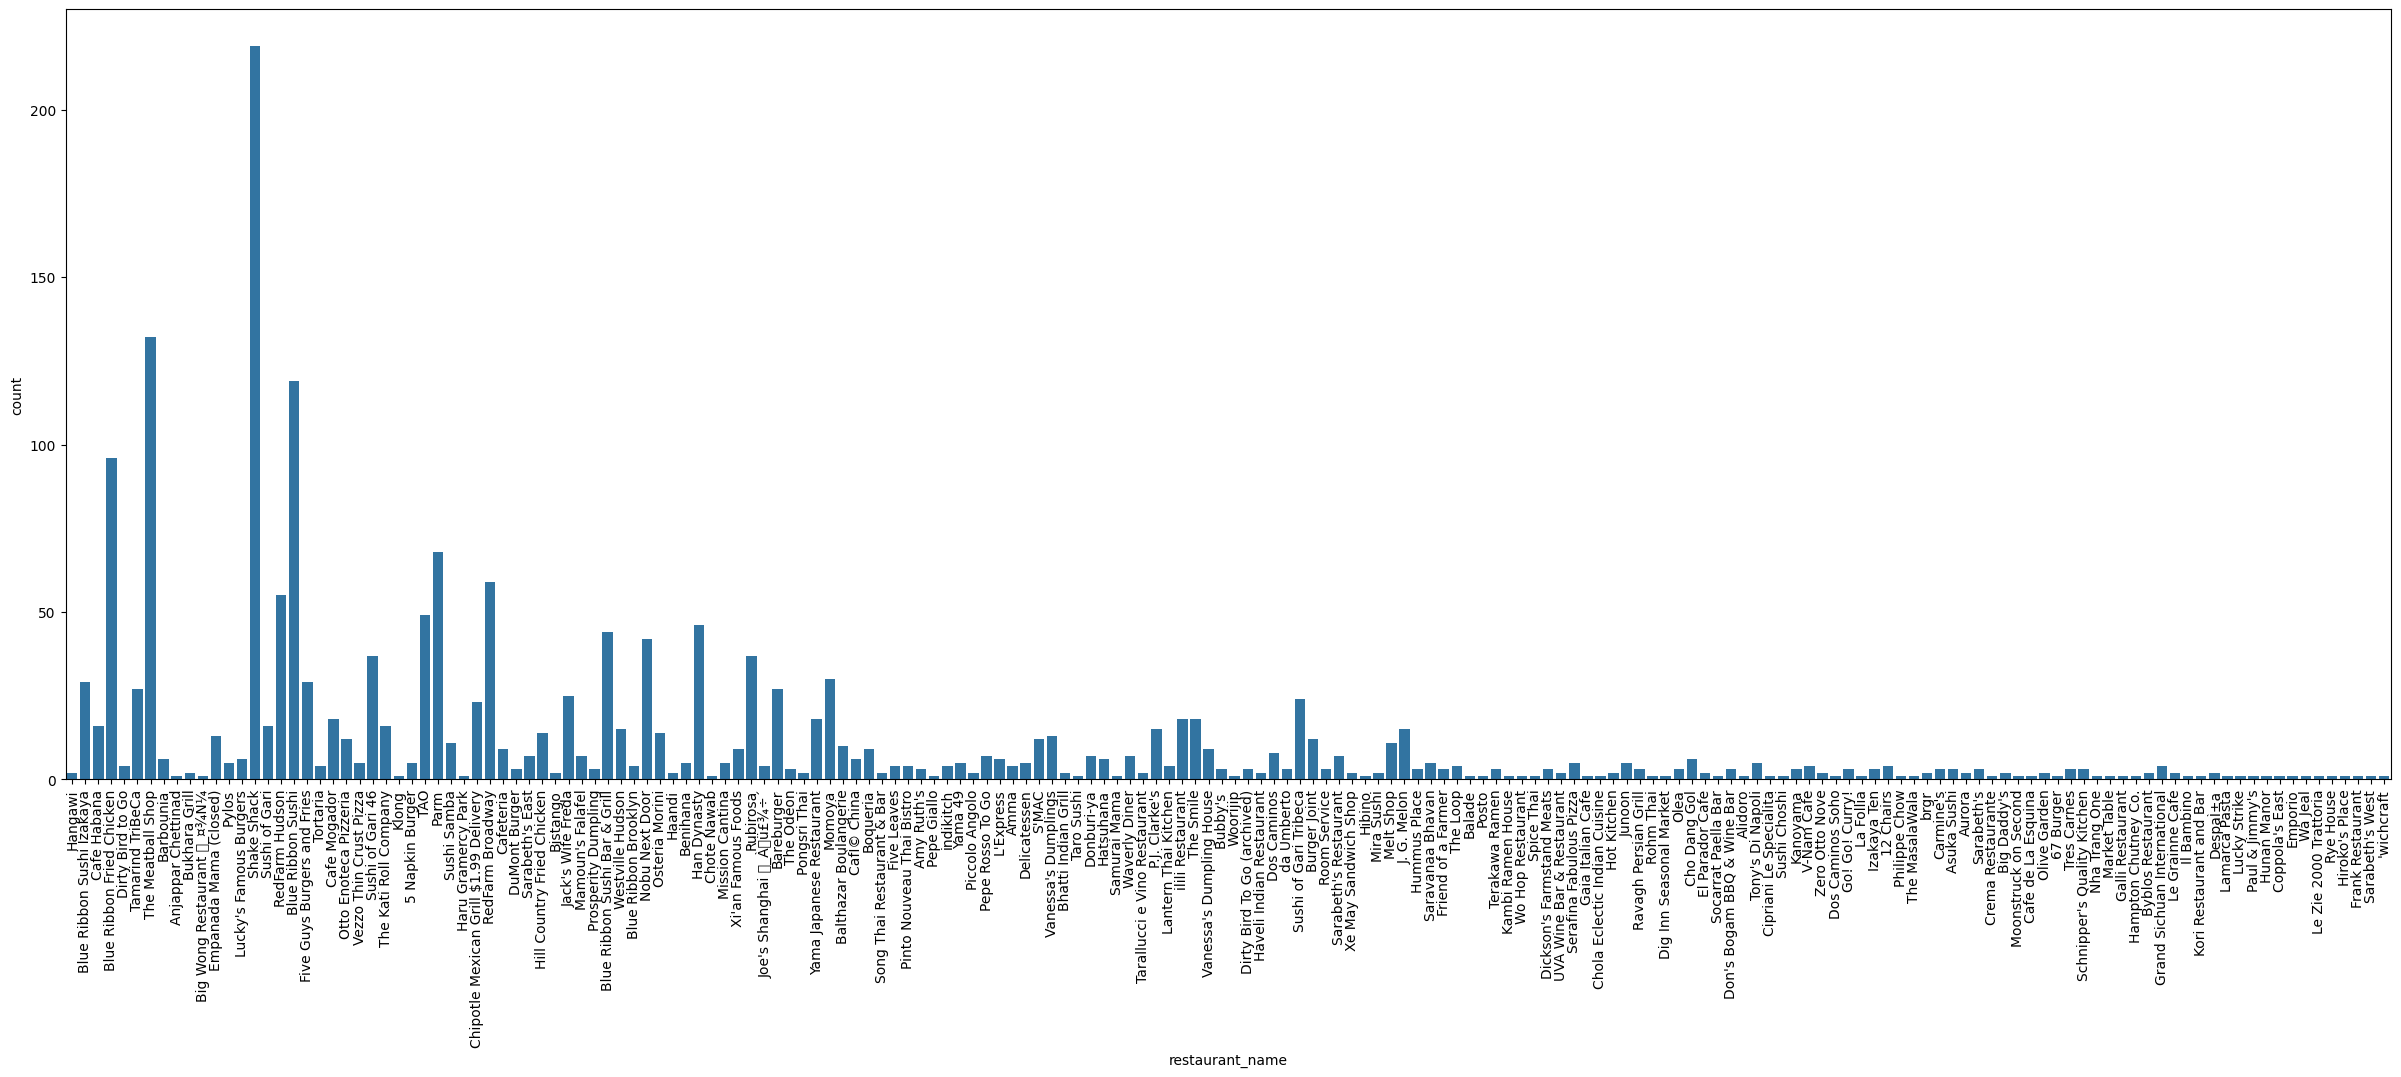

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90);
plt.show();

#### Observations:
The top 5 popular restaurents are:

Shake Shack                  219

The Meatball Shop            132

Blue Ribbon Sushi            119

Blue Ribbon Fried Chicken     96

Parm                          68


At no # 1 it is **Shake Shack** with 219 orders, followed by The **Meatball Shop** with 132, **Blue Ribbon Sushi** with 119 orders, **Blue Ribbon Fried Chicken** with 96 orders and **Parm** with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:

weekend_orders = df[df['day_of_the_week'] == 'Weekend']
print(weekend_orders['cuisine_type'].value_counts())

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


Observations



*   **American cusine seems to be most popular in the weekends**. Out of 584 total orders for Aerican cusine 415 are in the weekends.
*   **Least popular is Vietnamese**. Foodhub has the oppotunity to review if this is due to the number of Vietnamese cuisines on the platform are less and also review the timings of these hotels dueing the weekends.          

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Create a new data frame for orders with value more than $20
df_20above = df[df['cost_of_the_order']>20]

#Calculate the % of the orders with value more than 20
df_20above_percentage = (df_20above.shape[0] / df.shape[0]) * 100
print('% of orders that are more than $20 is : '  , round(df_20above_percentage,2) , '%' )

% of orders that are more than $20 is :  29.24 %


Observations:



*   **1/3rd of the [29.2%] of total orders are more than $20 value.**
*   This also means that customers might be ordering more than one item in each order. Based on this there could be possible opportinities to upsell.
*   It will be helpful to further analyse to see if these are from certain types cuisines
*   It will be helpful to see if these orders are some certain customers who repeatedly order high value orders.






### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean order delivery time can derived using the mean function on the column
df['delivery_time'].mean()

24.161749209694417

#### Observations:
24.16 mins is the mean order delivery time.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Top 3 cusotmers can be retreived by using the combination of value counts and head fuctions
print(df['customer_id'].value_counts().head(3))

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


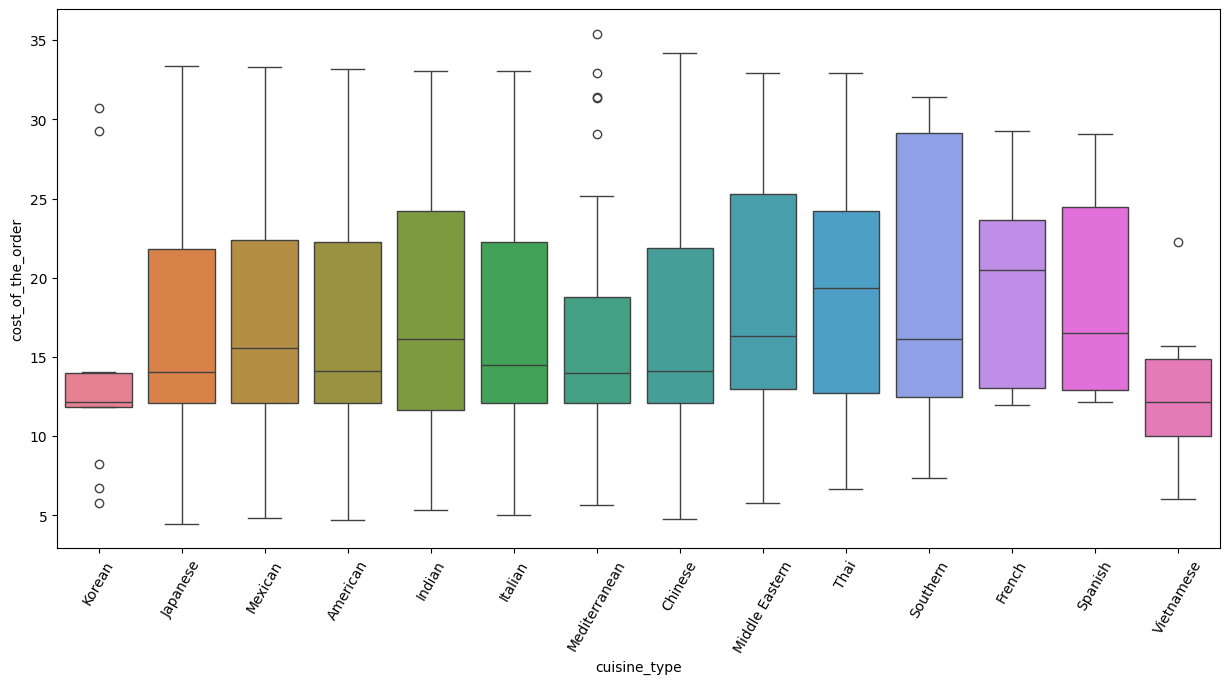

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", hue = "cuisine_type", legend = False)
plt.xticks(rotation = 60)
plt.show()

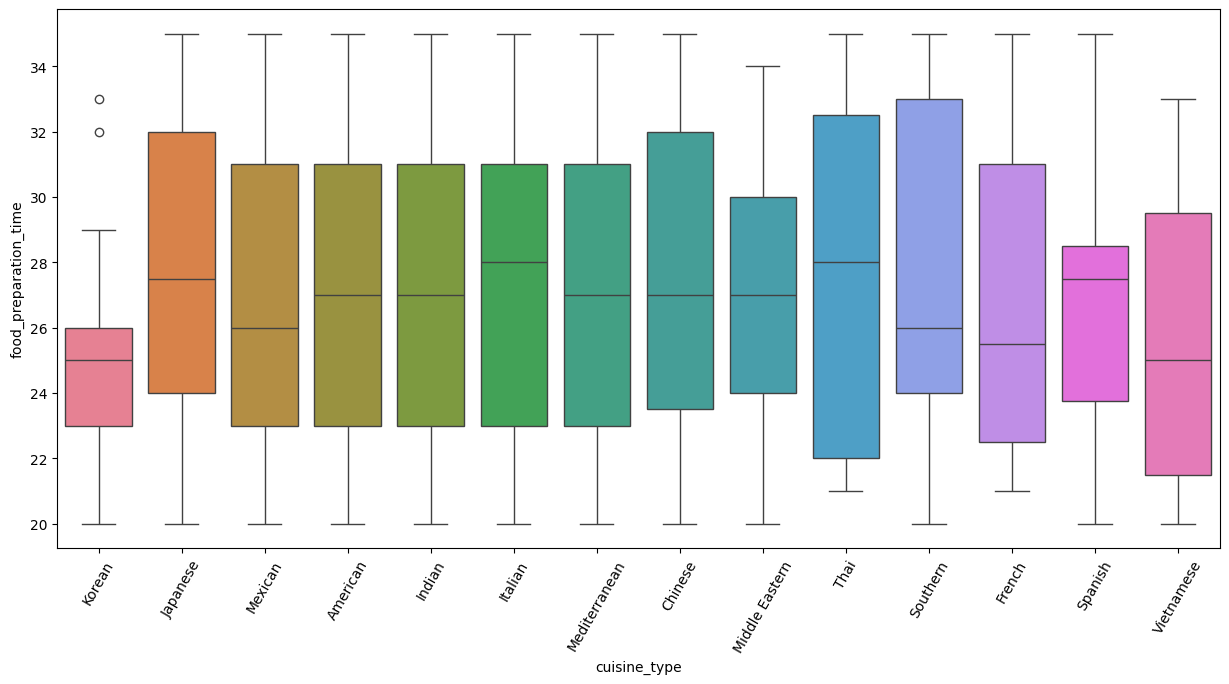

In [ ]:
# Relationship between Food preparation and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', hue = 'cuisine_type', legend = False)
plt.xticks(rotation = 60)
plt.show()

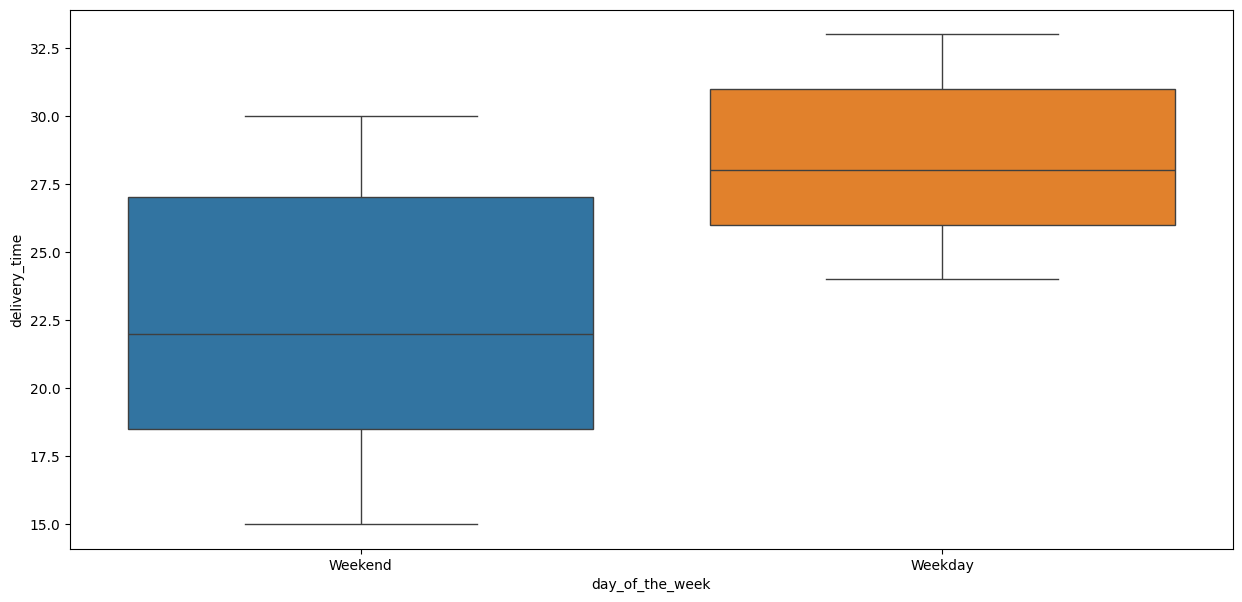

In [ ]:
# Relationship between Day of the week and Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot (x = 'day_of_the_week', y = 'delivery_time', data = df, hue = 'day_of_the_week', legend = False)
plt.show()

In [ ]:
#relationship of the total order cost for each restaurant and then sorting these totals.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

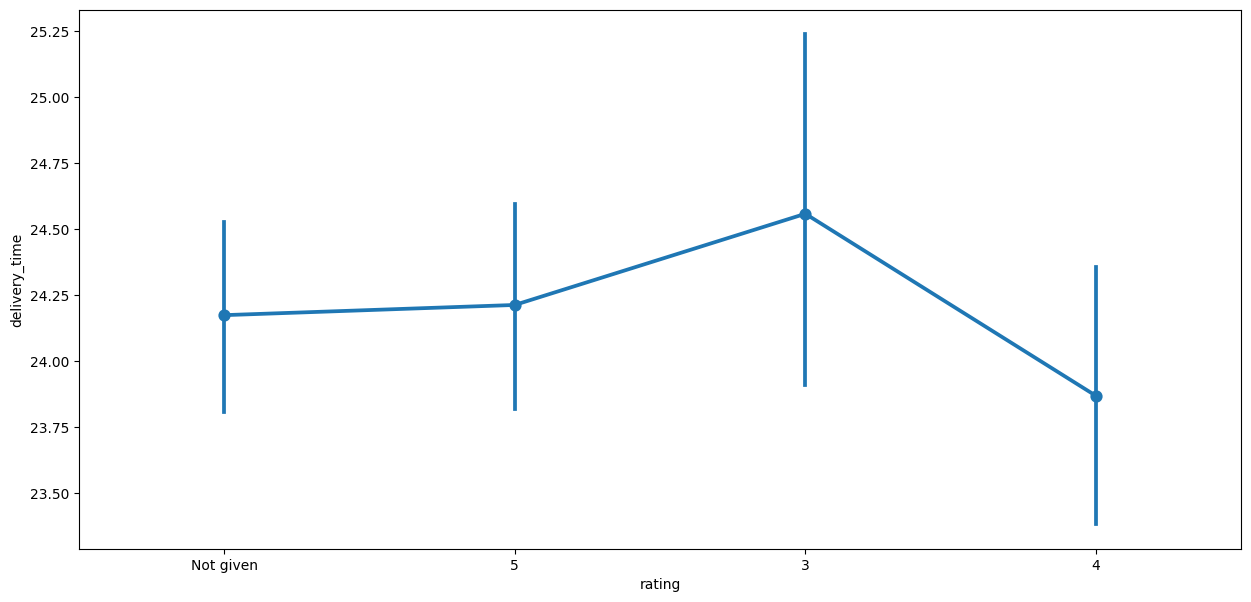

In [ ]:
#Relationship between rating and Delivery Time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

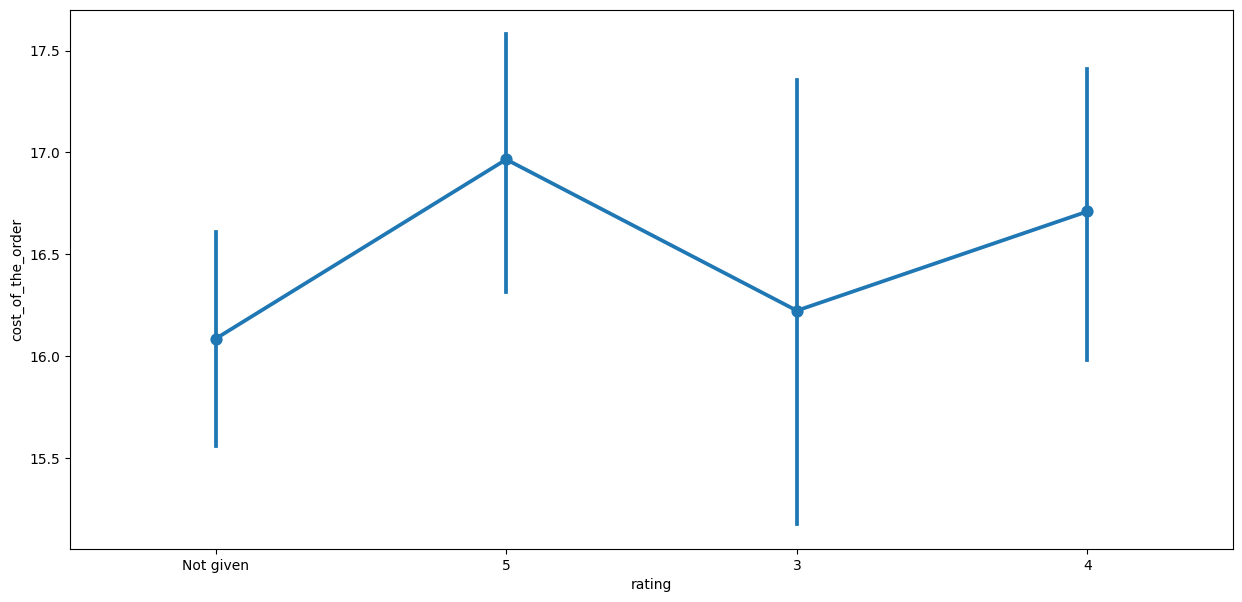

In [ ]:
# Relationship between Rating and Cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating' , y = 'cost_of_the_order' , data = df)
plt.show()

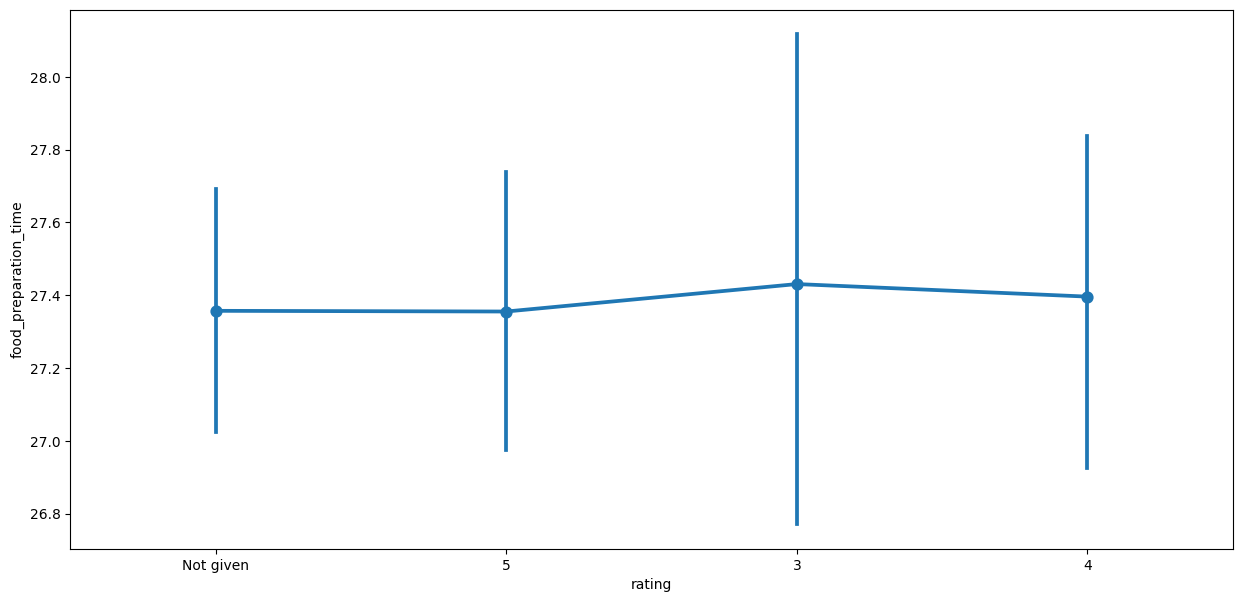

In [ ]:
# Relationship between Rating and Food preperation
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating' , y = 'food_preparation_time' , data=df)
plt.show()

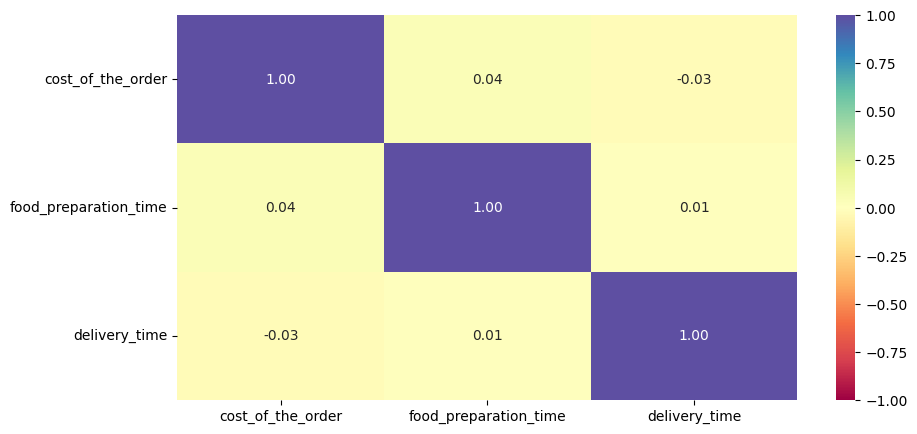

In [ ]:
#Corelation among the key numerical variables
#Plot the heatmap
var_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 5))
sns.heatmap(df[var_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rest_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Get the restaurant names (in to a stream) that have rating count more than 50
rest_names = df_rest_rating_count[df_rest_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_avg_rating4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

#df_mean_4['restaurant_name'].value_counts()

#There are only 4 restaurents that passed the criteria of having more than 50 ratings

# Let's get the average of the ratings of these 4 restaurents by grouping the restaurant names with their ratings and find the mean rating of each restaurant
df_avg_rating4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


#### Observations:
**The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi** meet the criteria of having more than 50 ratings at an average ratings of 4 or above.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue and compute the revenue
def compute_rev(cost):
    if cost > 20:
        return cost*0.25
    elif cost > 5:
        return cost*0.15
    else:
        return cost*0

#Create a new column to store the revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

#Function to get the total revenue
total_revenue = df['Revenue'].sum()
print('The net revenue is around $',round(total_revenue, 2))

The net revenue is around $ 6166.3


#### Observations:
**Profitability:** This value represents the revenue that the company earns from restaurants. If we have data on the company's costs or expenses, we could further analyze profitability.

**Revenue distribution:** It would be beneficial to know how this revenue is distributed across different restaurants, cuisines, or days of the week. For instance, are there specific restaurants or cuisines that generate significantly more revenue? Or are there certain days where the company sees a surge in revenue?

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#find the percentage of orders that have more than 60 minutes of total delivery time
df_greater_than_60 = df[df['total_time']>60]

print('The total number of orders that took more than 60 minutes to get delivered is:', df_greater_than_60.shape[0])

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that took more than 60 minutes to get delivered:", round(percentage, 2), '%')

The total number of orders that took more than 60 minutes to get delivered is: 200
Percentage of orders that took more than 60 minutes to get delivered: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#Get the the mean delivery time on weekdays and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekends is around 22 minutes


In [ ]:
#Get the mean delivery time on weekends and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


#### Observations:

Comparing the mean delivery times provided, the data suggests that the **delivery time** **during the weekends is quicker compared to weekdays.** This could be due to a variety of factors such as lower traffic conditions, more staff available during the weekends, or even the nature of orders being different on weekends as compared to weekdays.

If the quicker times on the weekend are due to factors that cannot be replicated during the week, the company may want to communicate this to customers, to manage their expectations about delivery times.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# **Conclusions:**
### *  From the detailed analysis of FoodHub's data, it's evident that the platform is providing a vital delivery service in a busy city like New York where the demand for online food delivery is high. The significant number of unique customers and orders suggest that the platform is extensively utilized, pointing towards the success of FoodHub's business model.

# **# Key observations include:**

### *  A majority of orders are placed during the weekends, indicating that FoodHub is a preferred choice for customers' leisure time or when they're likely away from their usual routine.
### *  A significant portion of orders are of cuisines like American, Japanese, and Italian, suggesting a diverse clientele with varied food preferences.
### *  Restaurants with higher ratings and more ratings tend to be more popular, reflecting the importance of quality and customer feedback in driving order volumes.
### *  The revenue generation from orders above $20 is substantial due to the higher margin on these orders.

# **# Areas of Improvement:**

### *  While the average delivery time is under the acceptable limit of 30 minutes, around 10% of orders take more than an hour, which suggests a potential area for improvement.

# In conclusion, FoodHub's business is well-positioned in the online food delivery market, but there is room for further growth and efficiency. Focusing on promoting high-rated restaurants, encouraging customer feedback, diversifying restaurant and cuisine options, and improving delivery times could be key areas to consider for enhancing customer satisfaction and business expansion.


# **Recommendations:**

### *  **Increase American and Japanese Cuisine Options**: Partner with more restaurants offering these cuisines and offer promotions to increase orders from these types of restaurants.

### *  **Promote High-rated Restaurants:** Advertise these restaurants more to boost customer satisfaction.

### *  **Investigate Delivery Time Differences:** Identify the reasons behind faster weekend delivery times and if possible, try to replicate these conditions on weekdays.

### *  **Encourage Order Ratings:** Provide incentives for customers to rate their orders, giving the company more data to identify improvement areas.

### *  **Loyalty or Rewards Program:** Consider a program to retain the top customers who place the most orders, encouraging them to order more frequently.

### *  **Reduce Delivery Time:** Investigate why approximately 10% of orders take more than an hour to deliver and take targeted measures to reduce this percentage.

---